In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from math import pi
from pandas.tools.plotting import parallel_coordinates

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

## Pandas

In [16]:
iris = pd.read_csv('Iris.csv')
iris_cp = iris.copy
iris = iris.drop(['Id'],axis=1)


Parellel plots show interesting patterns in data - individual obs on set of attributes 
Colormap paints classes with different colors 

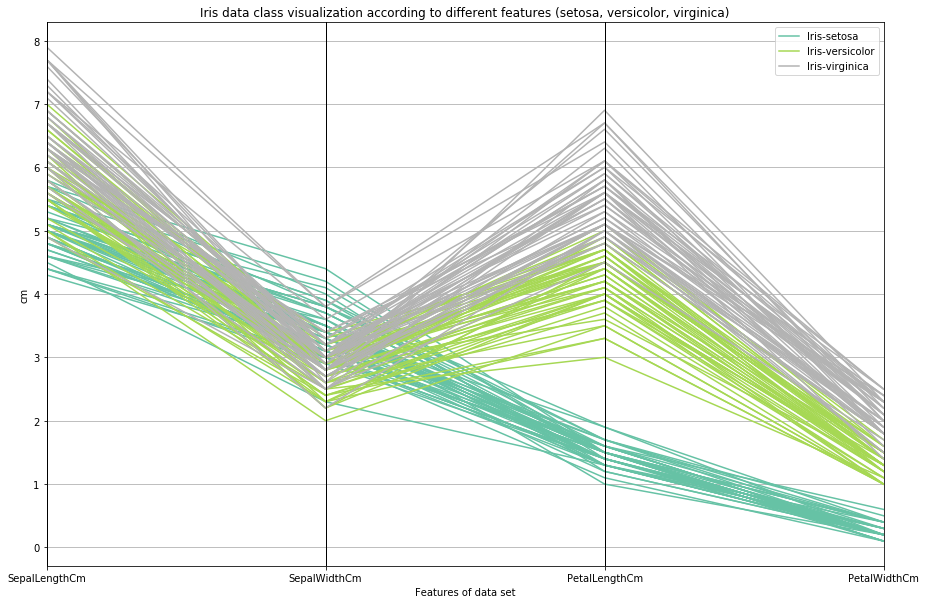

In [13]:
# Set up the parallel plot
plt.figure(figsize=(15,10))
parallel_coordinates(iris, 'Species', colormap=plt.get_cmap("Set2"))
plt.title("Iris data class visualization according to different features (setosa, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
plt.savefig('graph.png')
plt.show()

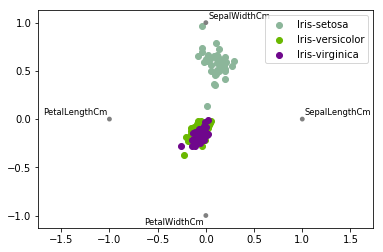

In [18]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

## Matplotlib

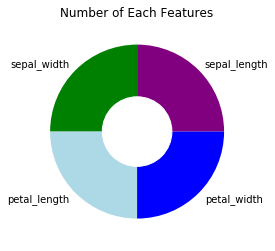

In [6]:
# donut plot
sepal_length = iris.iloc[:,0]
sepal_width = iris.iloc[:,1]
petal_length = iris.iloc[:,2]
petal_width = iris.iloc[:,3]

feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size = [len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]
# create a circle for the center of plot
circle = plt.Circle((0,0),0.4,color = "white") # change widh of hole in center here 
plt.pie(feature_size, labels = feature_names, colors = ["purple","green","lightblue","blue"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

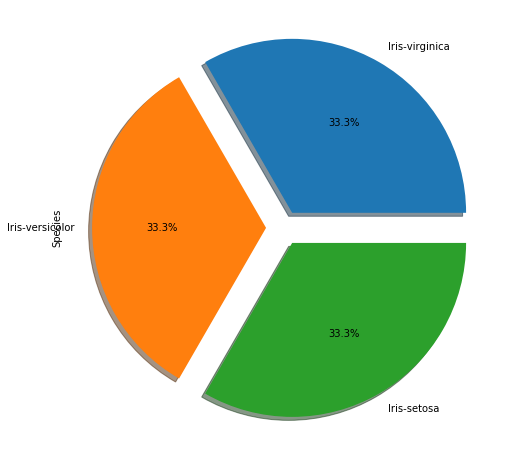

In [87]:
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [7]:
# A spider(radar) plot is a graphical method of displaying multivariate data in the 
# form of a two-dimensional chart of three or more quantitative variables.

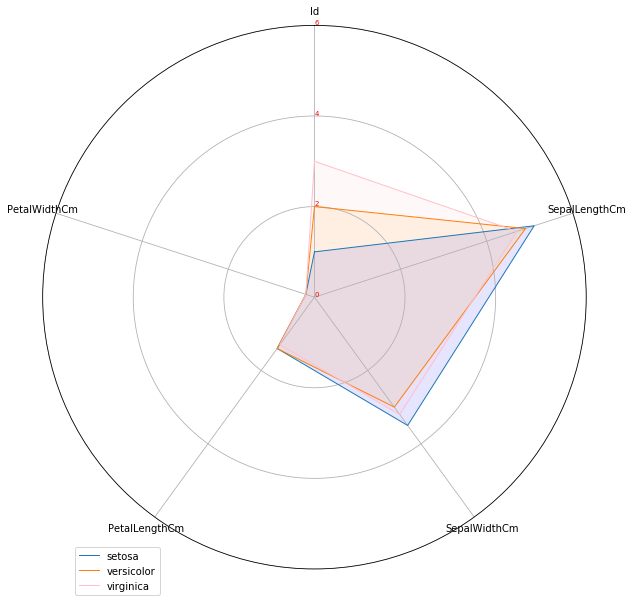

In [33]:
# spider graph
categories = list(iris)[:5]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]

plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = iris.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = iris.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)

values = iris.loc[2].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",color="pink",label ="virginica" )
ax.fill(angles,values,"pink",alpha=0.1)

plt.legend(loc = "upper left",bbox_to_anchor = (0.05,0.05))
plt.show()

## Seaborn

In [ ]:
# Plot a matrix dataset as a hierarchically-clustered heatmap -- Cluster map

In [ ]:
import seaborn as sns

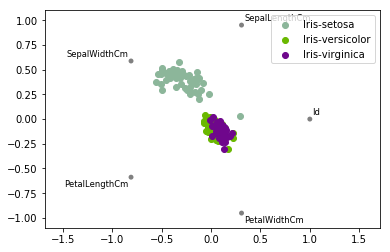

In [93]:
radviz(iris, "Species")

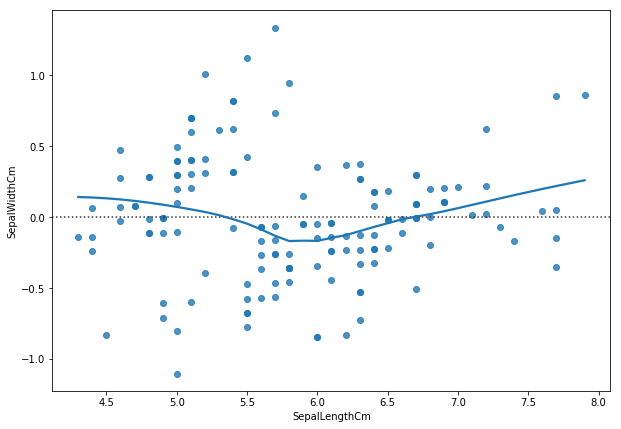

In [95]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.residplot('SepalLengthCm', 'SepalWidthCm',data=iris,lowess=True)

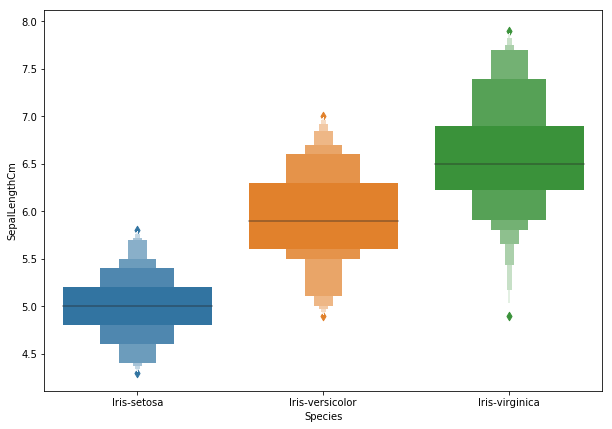

In [94]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxenplot(x='Species',y='SepalLengthCm',data=iris)

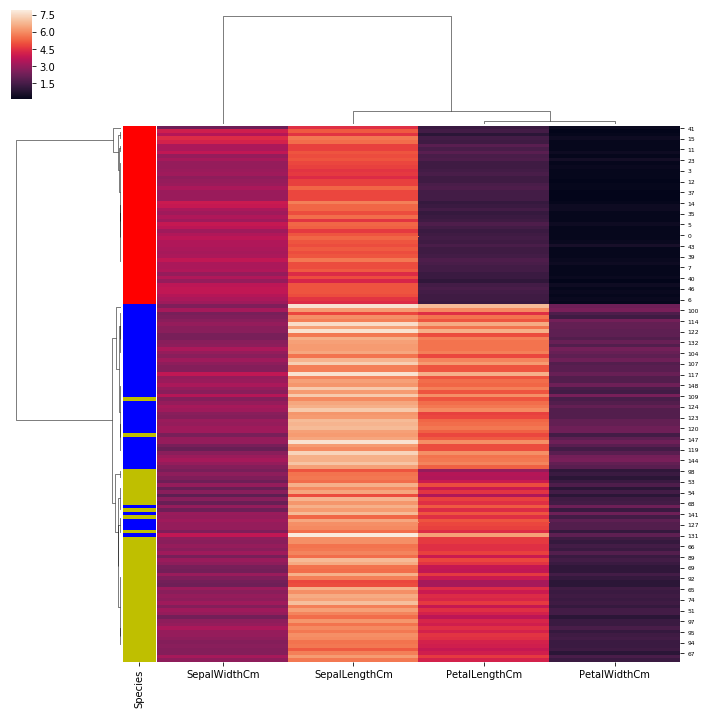

In [45]:
# cluster map (dendogram and tree)
df = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

df2 = iris.Species
x = dict(zip(df2.unique(),"ryb"))
row_colors = df2.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =6)
plt.show()

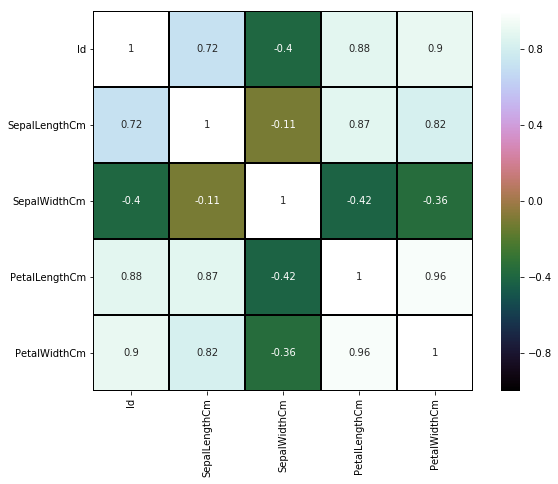

In [92]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

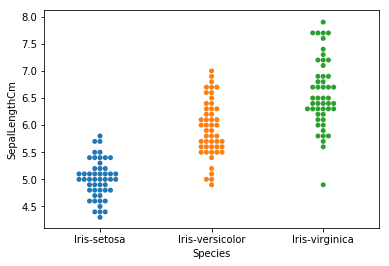

In [80]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
sns.swarmplot(x="Species", y="SepalLengthCm", data=iris)
plt.show()

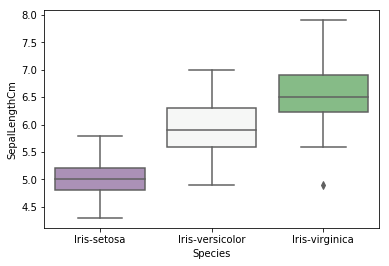

In [85]:
sns.boxplot(x="Species", y="SepalLengthCm", data=iris, palette="PRGn")
plt.show()

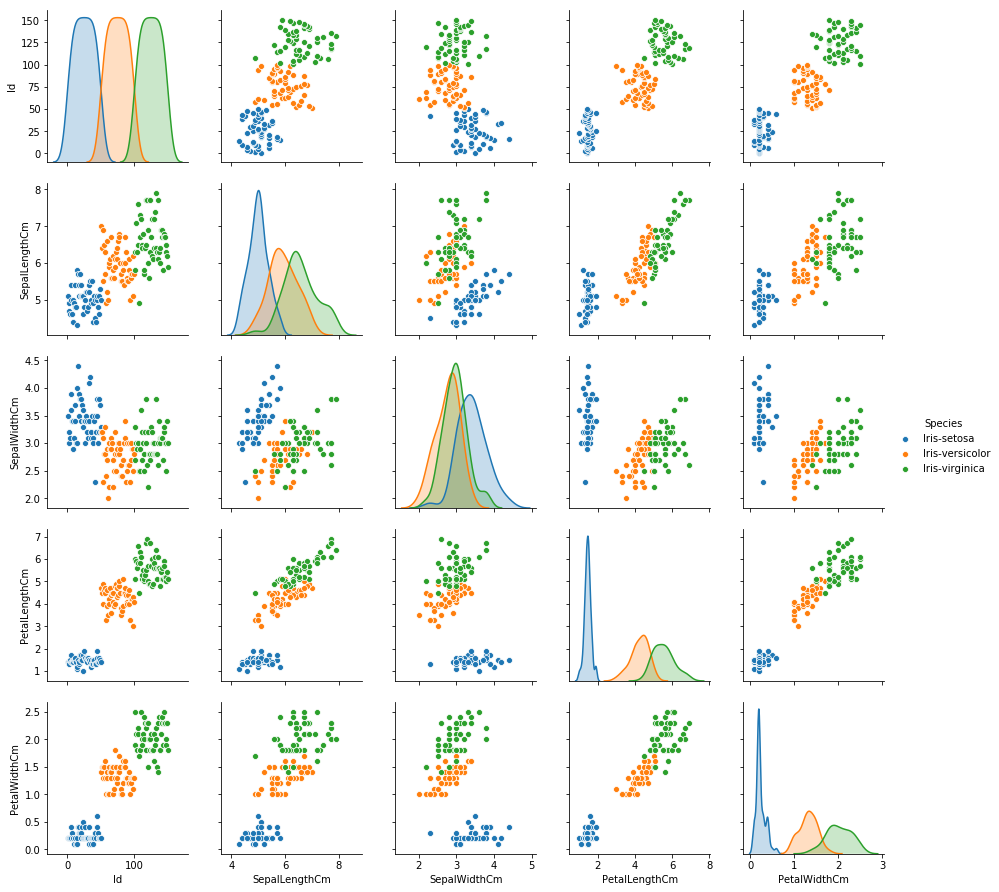

In [96]:
# pair plot
sns.pairplot(iris, hue="Species")
plt.show()

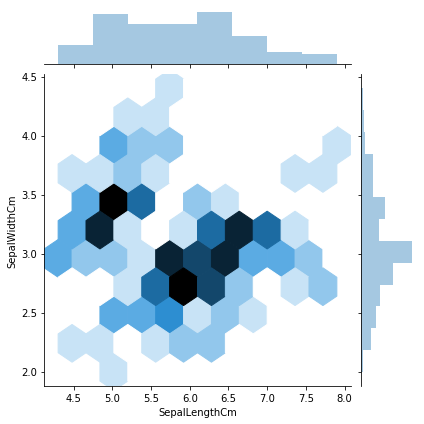

In [88]:
fig=sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',kind='hex',data=iris)

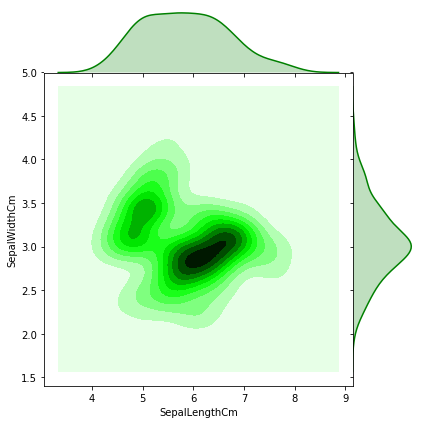

In [89]:
sns.jointplot("SepalLengthCm", "SepalWidthCm", data=iris, kind="kde",space=0,color='g')

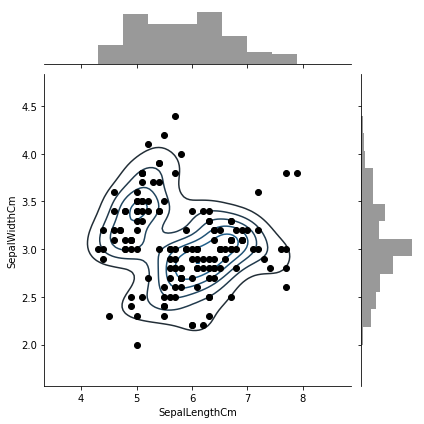

In [90]:
g = (sns.jointplot("SepalLengthCm", "SepalWidthCm",data=iris, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

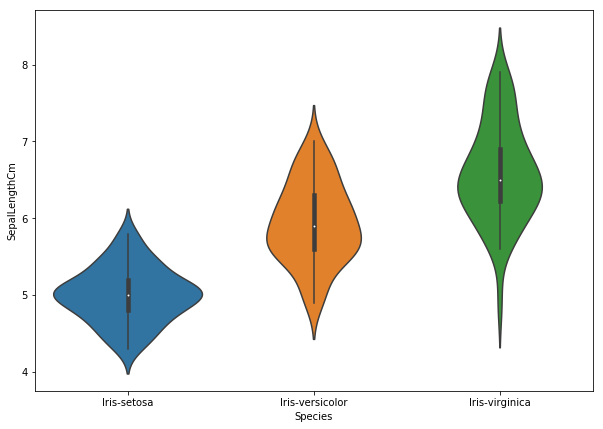

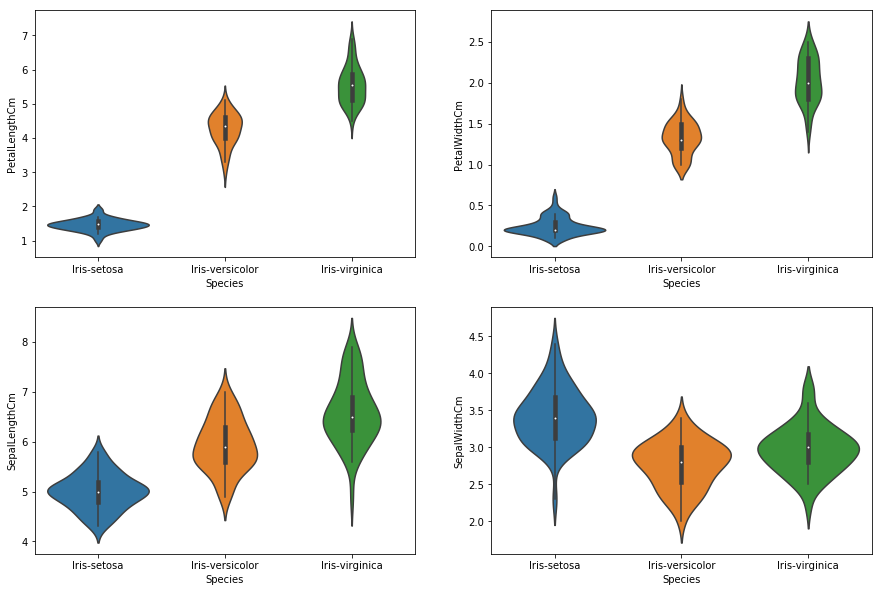

In [91]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

## Networkx

can be used instead of heatmaps in seaborn

gives corr() correlation. petal length is positively correlated with sepal length and petal width. Also, petal length is negatively correlated with sepal width.
- respresent relationships etween different features in a datset with network graphs 
- threshold: threshold of the correlation. For example, if we say that threshold = 0.5, network will be established between the nodes that have higher correlation than 0.5threshold: threshold of the correlation. For example, if we say that threshold = 0.5, network will be established between the nodes that have higher correlation than 0.5
- used in data sets that are related with populations and their habits

In [8]:
iris.iloc[0:10,0:3]

,Id,SepalLengthCm,SepalWidthCm
0,1,5.1,3.5
1,2,4.9,3.0
2,3,4.7,3.2
3,4,4.6,3.1
4,5,5.0,3.6
5,6,5.4,3.9
6,7,4.6,3.4
7,8,5.0,3.4
8,9,4.4,2.9
9,10,4.9,3.1


In [9]:
# Calculate the correlation between individual attributes
corr = iris.iloc[:,0:5].corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


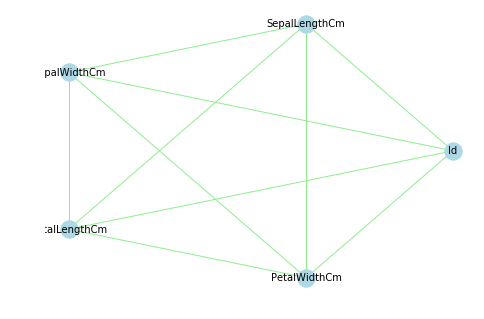

In [10]:
# import networkx library
import networkx as nx

# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']

# correlation
threshold = -1

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network
nx.draw_circular(G, with_labels=True, node_color='lightblue', node_size=300, edge_color='lightgreen', linewidths=1, font_size=10)

## Plotly 

In [68]:
import plotly.plotly as py
import plotly.graph_objs as go
# trace1 is line plot
# go: graph object
trace1 = go.Scatter(
    x=df.index,
    y=df.SepalLengthCm,
    mode = "markers",
    xaxis='x2',
    yaxis='y2',
    name = "SepalLengthCm",
    marker = dict(color = 'rgba(0, 112, 20, 0.8)'),
)

# trace2 is histogram
trace2 = go.Histogram(
    x=df.SepalLengthCm,
    opacity=0.75,
    name = "Sepal Length(Cm)",
    marker=dict(color='lightblue')
)

# add trace1 and trace2
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.7, 1],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = ' Sepal Length(Cm) Histogram and Scatter Plot'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [74]:
# Create random data with numpy
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N)+5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N)-5

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines',
    name = 'lines'
)

data = [trace0, trace1, trace2]
iplot(data, filename='scatter-mode')

In [77]:
# data of iris setosa
iris_setosa = iris[iris.Species == "Iris-setosa"]
# # data of iris virginica
iris_virginica = iris[iris.Species == "Iris-virginica"]

# # data of iris virginica
iris_versicolor = iris[iris.Species == "Iris-versicolor"]

# trace1 =  iris setosa
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name = "iris_setosa",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 =  iris virginica
trace2 = go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode='markers',
    name = "iris_virginica",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
# trace3 =  iris versicolor
trace3 = go.Scatter3d(
    x=iris_versicolor.SepalLengthCm,
    y=iris_versicolor.SepalWidthCm,
    z=iris_versicolor.PetalLengthCm,
    mode='markers',
    name = "iris_versicolor",
    marker=dict(
        color='pink',
        size=12,
        line=dict(
            color='pink',
            width=0.1
        )
    )
)


data = [trace1, trace2, trace3]
layout = go.Layout(
    title = ' 3D iris_setosa, iris_versicolor and iris_virginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Refs:
- https://www.kaggle.com/kanncaa1/rare-visualization-tools
- https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners
- https://www.kaggle.com/biphili/seaborn-matplotlib-plot-to-visualize-iris-data